<center><H1> Machine Learning Lab #12

<H3>  Support Vector Machines

In [2]:
#Generic Imports

import math
import io
import re
import inspect
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [3]:
#Problem specific Import

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


<H2>Questions

1. Use the given code and modify for IRIS dataset. Implement the SVM classifier in Python (make use
of scikit-learn library). Apply the linear kernel function. Plot the scatter plot of the input features. Plot
the decision boundary.

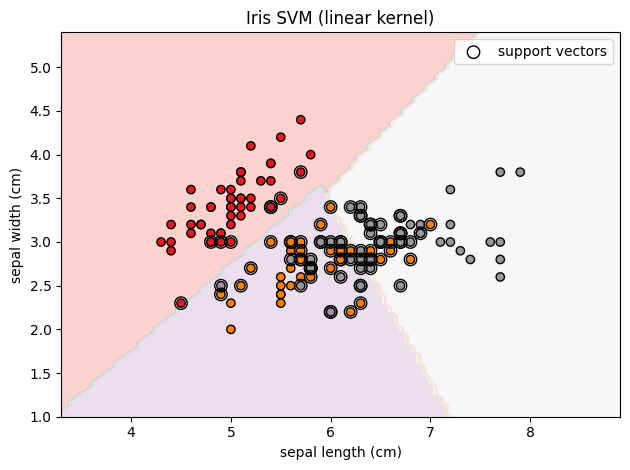

In [4]:
iris = load_iris()
X = iris.data[:, :2]   
y = iris.target

clf = SVC(kernel="linear", C=1.0).fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict",
    cmap=plt.cm.Pastel1, alpha=0.6,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolors="k")
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            facecolors="none", edgecolors="k", s=80, label="support vectors")
plt.legend()
plt.title("Iris SVM (linear kernel)")
plt.tight_layout()
plt.show()

2. Construct a simple SVM classifier that separates the two classes:

Positively labeled data points: (4, 1), (4, -1), (6, 0)

Negatively labeled data points: (1, 0), (0, 1), (0, -1)

For all negatively labeled points, the output is -1, and for all positively labeled points, the output
is 1.

Implement the python function program to draw the hyperplane that separates the two classes using
scikit-learn library. Plot the scatter plot of the input features.

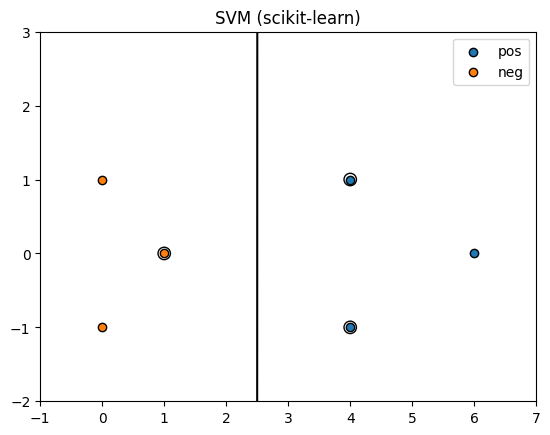

In [5]:
pos = np.array([[4,1],[4,-1],[6,0]])
neg = np.array([[1,0],[0,1],[0,-1]])
X = np.vstack((pos,neg))
y = np.hstack((np.ones(len(pos)),-np.ones(len(neg))))
labels = ['pos']*len(pos)+['neg']*len(neg)

def plot_data(ax):
    ax.scatter(pos[:,0],pos[:,1],c='C0',edgecolor='k',label='pos')
    ax.scatter(neg[:,0],neg[:,1],c='C1',edgecolor='k',label='neg')
    ax.set_xlim(-1,7); ax.set_ylim(-2,3); ax.legend()

# 1) using scikit-learn (linear SVM)
clf = SVC(kernel='linear', C=1e6).fit(X,y)
w = clf.coef_.ravel(); b = clf.intercept_[0]
xx = np.linspace(-1,7,200)
yy = -(w[0]*xx + b)/w[1]

fig,ax = plt.subplots()
plot_data(ax)
ax.plot(xx,yy,'k-',label='sklearn SVM')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
           facecolors='none', edgecolors='k', s=80, label='SV')
ax.set_title('SVM (scikit-learn)'); plt.show()

3. Solve Qn (2) manually in your Observation book and implement without using scikit-learn library.

/tmp/ipykernel_332323/2808200786.py:15: RuntimeWarning: divide by zero encountered in divide
  yy2 = -(w2[0]*xx + b2)/w2[1]


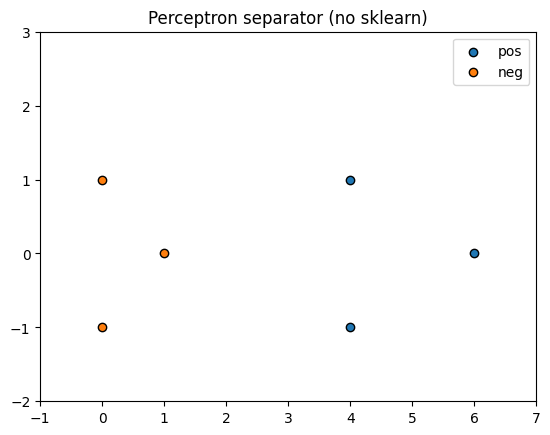

In [6]:
def perceptron(X,y,lr=1.0,epochs=1000):
    w = np.zeros(X.shape[1]); b = 0.0
    for _ in range(epochs):
        changed = False
        for xi, yi in zip(X,y):
            if yi*(w.dot(xi)+b) <= 0:
                w += lr*yi*xi
                b += lr*yi
                changed = True
        if not changed:
            break
    return w,b

w2,b2 = perceptron(X,y,lr=0.5,epochs=1000)
yy2 = -(w2[0]*xx + b2)/w2[1]

fig,ax = plt.subplots()
plot_data(ax)
ax.plot(xx,yy2,'r--',label='perceptron')
ax.set_title('Perceptron separator (no sklearn)'); plt.show()

4. Develop a Python function program to sketch the hyperplane 1 + 2X1 + 3X2 = 0 without using scikit-
learn library. Indicate the set of points for which:

1 + 3X1 − X2 > 0,

1 + 3X1 − X2 < 0

and 1 + 3X1 −X2=0.

Take x1, x2 ∈ (-10, 10). Plot the graph for every +/- 1 increment. Find the slope and intercept.

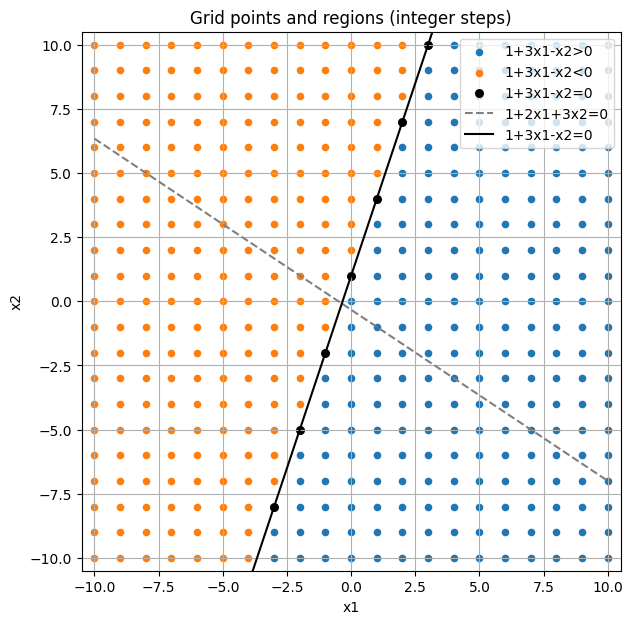

1+2x1+3x2=0 -> slope: -0.6666666666666666 intercept: -0.3333333333333333
1+3x1-x2=0 -> slope: 3 intercept: 1


In [7]:
def sketch():
    r = np.arange(-10,11,1)
    X1, X2 = np.meshgrid(r,r)
    expr = 1 + 3*X1 - X2
    pos = expr > 0
    neg = expr < 0
    eq  = expr == 0

    plt.figure(figsize=(7,7))
    plt.scatter(X1[pos], X2[pos], c='C0', s=20, label='1+3x1-x2>0')
    plt.scatter(X1[neg], X2[neg], c='C1', s=20, label='1+3x1-x2<0')
    plt.scatter(X1[eq],  X2[eq],  c='k',  s=30, label='1+3x1-x2=0')

    x = np.linspace(-10,10,201)
    # hyperplane 1 + 2x1 + 3x2 = 0 -> x2 = -(1+2x1)/3
    y1 = -(1 + 2*x)/3
    plt.plot(x,y1,'--', color='gray', label='1+2x1+3x2=0')

    # line for the inequality boundary 1+3x1-x2=0 -> x2 = 1+3x1
    y2 = 1 + 3*x
    plt.plot(x,y2,'-', color='k', label='1+3x1-x2=0')

    plt.xlim(-10.5,10.5); plt.ylim(-10.5,10.5)
    plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(); plt.grid(True); plt.gca().set_aspect('equal')
    plt.title('Grid points and regions (integer steps)')
    plt.show()

    slope1 = -2/3; intercept1 = -1/3
    slope2 = 3; intercept2 = 1
    return (slope1, intercept1), (slope2, intercept2)

(s1,b1),(s2,b2) = sketch()
print("1+2x1+3x2=0 -> slope:", s1, "intercept:", b1)
print("1+3x1-x2=0 -> slope:", s2, "intercept:", b2)


5. Given two hyperplanes for SVM classifier 1 and SVM classifier 2, find the best hyperplane
corresponding to the classifier:

a. 5+2x1+5x2

b. 5+20x1+50x2

Implement Python function program to draw the hyperplane that separates the two classes (without
scikit-learn library). Plot the scatter plot of the input features.
Indicate the set of points for which:

5+2*x1+ 5*x2 > 0,

5+2*x1+ 5*x2 <0,

and 5+2*x1+ 5*x2 = 0

On the same plot, Indicate the set of points for which 5+20*x1+50*x2 > 0, 5+20*x1+50*x2 < 0, and
5+20*x1+50*x2 =0.
Find the slope and intercept.

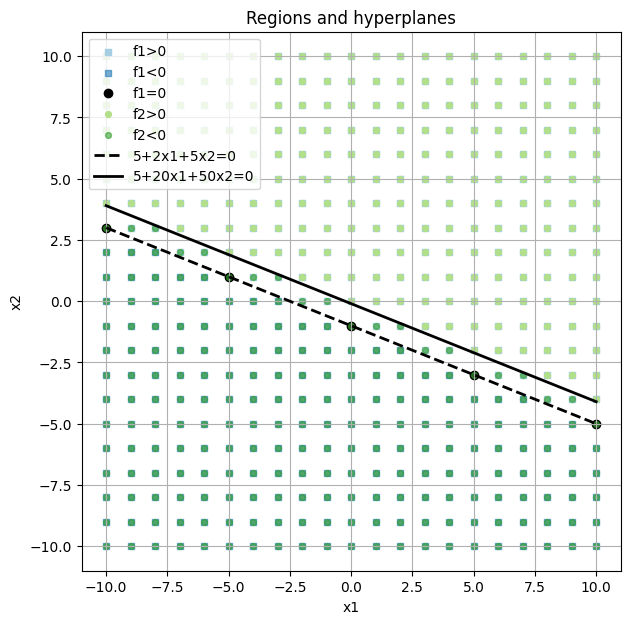

Hyperplane 1: slope = -0.4 intercept = -1.0
Hyperplane 2: slope = -0.4 intercept = -0.1


In [8]:
def plot_two_hyperplanes(xmin=-10,xmax=10,step=1):
    r = np.arange(xmin,xmax+1,step)
    X1,X2 = np.meshgrid(r,r)
    f1 = 5 + 2*X1 + 5*X2
    f2 = 5 + 20*X1 + 50*X2

    plt.figure(figsize=(7,7))
    plt.scatter(X1[f1>0], X2[f1>0], c='#a6cee3', s=18, label='f1>0', marker='s')
    plt.scatter(X1[f1<0], X2[f1<0], c='#1f78b4', s=18, label='f1<0', marker='s', alpha=0.6)
    plt.scatter(X1[f1==0], X2[f1==0], c='k', s=36, label='f1=0')

    plt.scatter(X1[f2>0], X2[f2>0], c='#b2df8a', s=18, label='f2>0', marker='o')
    plt.scatter(X1[f2<0], X2[f2<0], c='#33a02c', s=18, label='f2<0', marker='o', alpha=0.6)
    plt.scatter(X1[f2==0], X2[f2==0], c='k', s=36)

    x = np.linspace(xmin,xmax,400)
    y1 = -(5 + 2*x)/5
    y2 = -(5 + 20*x)/50
    plt.plot(x,y1,'k--', linewidth=2, label='5+2x1+5x2=0')
    plt.plot(x,y2,'k-', linewidth=2, label='5+20x1+50x2=0')

    plt.xlim(xmin-1,xmax+1); plt.ylim(xmin-1,xmax+1)
    plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(loc='upper left'); plt.grid(True); plt.gca().set_aspect('equal')
    plt.title('Regions and hyperplanes')
    plt.show()

    slope1, intercept1 = -2/5, -5/5
    slope2, intercept2 = -20/50, -5/50
    return (slope1, intercept1), (slope2, intercept2)

(s1,b1),(s2,b2) = plot_two_hyperplanes()
print("Hyperplane 1: slope =", s1, "intercept =", b1)
print("Hyperplane 2: slope =", s2, "intercept =", b2)

---